In [ ]:
##### Fabian Ivan Yovinanda // A112019.11754

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("valorant-stats.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[0.000e+00 6.750e+00]
 [2.000e+02 3.300e+00]
 [4.000e+02 1.000e+01]
 [5.000e+02 6.750e+00]
 [8.000e+02 4.000e+00]
 [1.000e+03 1.800e+01]
 [1.600e+03 1.333e+01]
 [2.100e+03 9.150e+00]
 [2.500e+03 6.500e+00]
 [2.900e+03 1.100e+01]
 [2.900e+03 9.250e+00]
 [1.100e+03 1.500e+00]
 [4.500e+03 7.500e-01]
 [9.000e+02 1.100e+00]
 [1.500e+03 3.500e+00]
 [1.600e+03 1.000e+01]
 [3.200e+03 1.200e+01]]


In [4]:
print(y)

[ 18   2  17  21  43  21  18  30  49  26  33  85 127   8   9  23  26]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
print(x_train)

[[8.00e+02 4.00e+00]
 [4.00e+02 1.00e+01]
 [1.50e+03 3.50e+00]
 [2.90e+03 9.25e+00]
 [2.10e+03 9.15e+00]
 [3.20e+03 1.20e+01]
 [1.10e+03 1.50e+00]
 [5.00e+02 6.75e+00]
 [0.00e+00 6.75e+00]
 [1.00e+03 1.80e+01]
 [1.60e+03 1.00e+01]
 [4.50e+03 7.50e-01]]


In [7]:
print(x_test)

[[2.000e+02 3.300e+00]
 [1.600e+03 1.333e+01]
 [2.500e+03 6.500e+00]
 [2.900e+03 1.100e+01]
 [9.000e+02 1.100e+00]]


In [8]:
print(y_train)

[ 43  17   9  33  30  26  85  21  18  21  23 127]


In [9]:
print(y_test)

[ 2 18 49 26  8]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[-0.65596692 -0.78221944]
 [-0.97083104  0.50803943]
 [-0.10495471 -0.88974101]
 [ 0.99706972  0.34675707]
 [ 0.36734147  0.32525276]
 [ 1.23321781  0.93812572]
 [-0.41981883 -1.3198273 ]
 [-0.89211501 -0.19085079]
 [-1.28569516 -0.19085079]
 [-0.49853486  2.22838459]
 [-0.02623868  0.50803943]
 [ 2.2565262  -1.48110966]]


In [12]:
print(x_test)

[[-1.1282631  -0.93274964]
 [-0.02623868  1.2241331 ]
 [ 0.6822056  -0.24461158]
 [ 0.99706972  0.72308257]
 [-0.57725089 -1.40584456]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

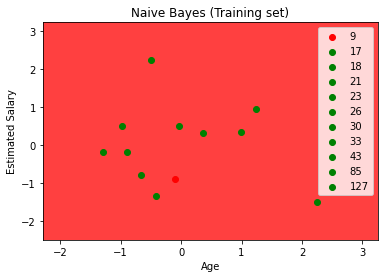

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() +  1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +  1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,  j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label= j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

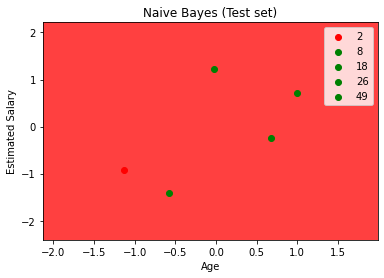

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() +  1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +  1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,  j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label= j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend()
plt.show()